# Relu算法学习

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from matplotlib.gridspec import GridSpec
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.activations import linear, relu, sigmoid
from matplotlib.widgets import Slider
from lab_utils_common import dlc
from autils import plt_act_trio
from lab_utils_relu import *
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)


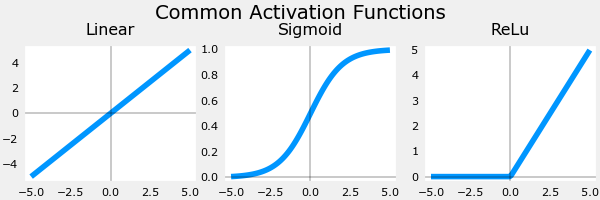

In [2]:
plt_act_trio()

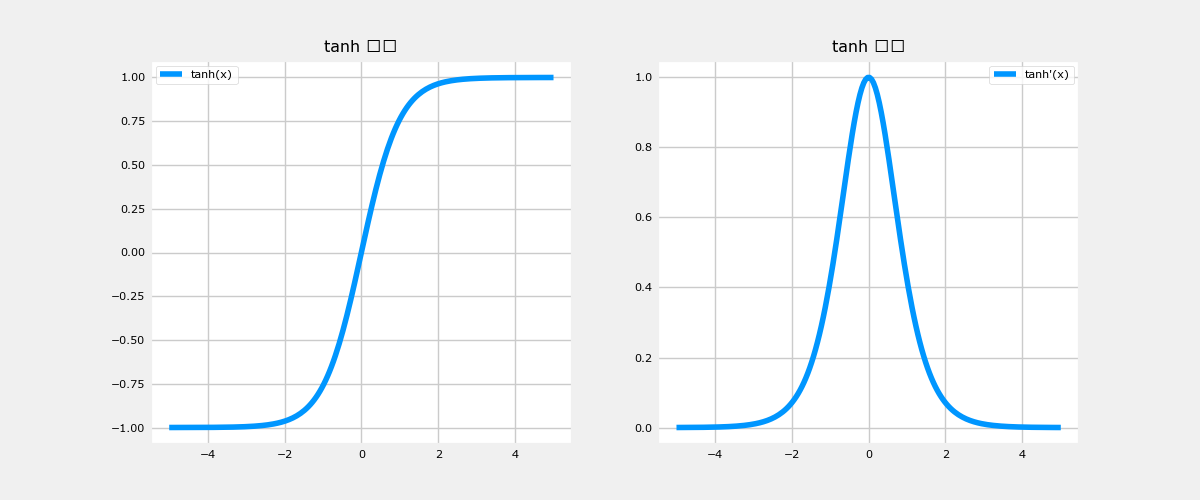

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 定义 tanh 函数
def tanh(x):
    return np.tanh(x)
    # 或者用这个公式：
    # return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

# 定义 tanh 的导数
def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# 创建数据点
x = np.linspace(-5, 5, 200)

# 绘制tanh和其导数
plt.figure(figsize=(12, 5))

# tanh函数
plt.subplot(1, 2, 1)
plt.plot(x, tanh(x), label='tanh(x)')
plt.grid(True)
plt.legend()
plt.title('tanh 函数')

# tanh导数
plt.subplot(1, 2, 2)
plt.plot(x, tanh_derivative(x), label='tanh\'(x)')
plt.grid(True)
plt.legend()
plt.title('tanh 导数')

plt.show()

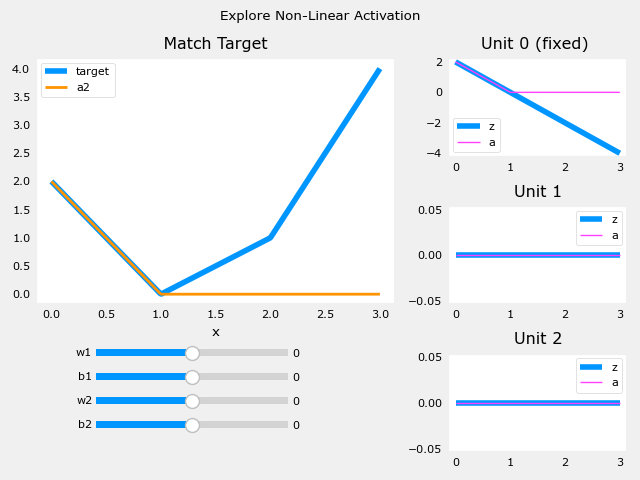

In [4]:
_ = plt_relu_ex()

(100,)


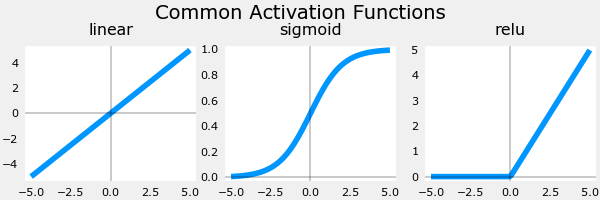

In [8]:
def plt_act_trio():
    X = np.linspace(-5,5, 100)
    print(f"{X.shape}")
    fig,ax = plt.subplots(1,3,figsize=(6,2))
    widgvis(fig)
    ax[0].plot(X, tf.keras.activations.linear(X))
    ax[0].axvline(0, lw=0.3, c="black")
    ax[0].axhline(0, lw=0.3, c="black")
    ax[0].set_title("linear")
    ax[1].plot(X,tf.keras.activations.sigmoid(X))
    ax[1].axvline(0, lw=0.3, c="black")
    ax[1].axhline(0, lw=0.3, c="black")
    ax[1].set_title("sigmoid")
    ax[2].plot(X, tf.keras.activations.relu(X))
    ax[2].axhline(0, lw=0.3, c="black")
    ax[2].axvline(0, lw=0.3, c="black")
    ax[2].set_title("relu")
    fig.suptitle("Common Activation Functions", fontsize=14)
    fig.tight_layout(pad=0.2)
    plt.show()
    
plt_act_trio()

(100, 1)


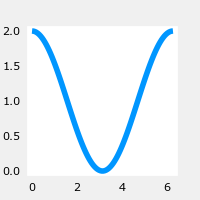

In [28]:
X = np.linspace(0,2*np.pi, 100).reshape(-1,1)
print(X.shape)
y = np.cos(X)+1
# y[50:100]=0
fig,ax=plt.subplots(1,1,figsize=(2,2))
widgvis(fig)
ax.plot(X,y)
plt.show()

In [29]:
model = Sequential([
    Dense(20, activation='relu', name='l1'),
    Dense(1, activation='linear', name='l2')
])

model.compile(
     loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(0.01),
)

model.fit(
    X,y,
    epochs=1000,
    verbose=0
)

In [30]:
yhat = model.predict(X)

2/4 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x17a5ccb80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


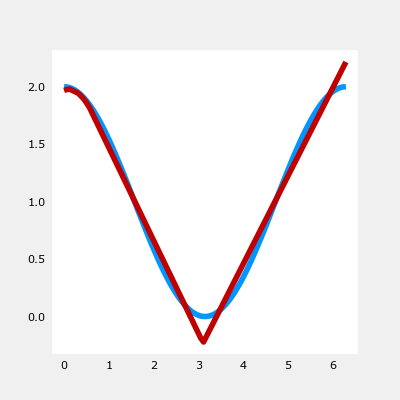

In [31]:
fig,ax =plt.subplots(1,1,figsize=(4,4))
ax.plot(X,y)
ax.plot(X,yhat,c=dlc["dldarkred"])
plt.show()